<a href="https://colab.research.google.com/github/cochelevalexander/python_lab_tribo/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ
ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
«ОРЛОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ ИМЕНИ И.С.ТУРГЕНЕВА»


> Кафедра «мехатроники, механики и робототехники»





>Лабораторная работа по триботехнике





>Выполнил студент
>Политехнического института
>имени Н.Н.Поликарпова
>студент группы 91-МХ
>Кошелев Александр Сергеевич




>Орёл, 2021






In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 17.9 MB/s 
     |████████████████████████████████| 46 kB 2.4 MB/s 
     |████████████████████████████████| 189 kB 36.2 MB/s 
     |████████████████████████████████| 56 kB 859 kB/s 
     |████████████████████████████████| 51 kB 115 kB/s 
Mounted at /content/gdrive


**Импорт библиотек**

In [ ]:
from fastai.vision.all import*

In [ ]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing')
path_all = ('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Test')

In [ ]:
path.ls()

(#4) [Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/1_normal'),Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/2_skewed_shaft'),Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/3_imbalanced_shaft'),Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/4_weared_bearing')]

In [ ]:
files = get_image_files(path)

In [ ]:
files[0], files[1]

(Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/1_normal/img_thermal_1637761638400.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/1_normal/img_thermal_1637761714077.jpg'))

**Создание дата сета**


In [ ]:
IRI_data =DataBlock(
    blocks= ( ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed = 42),
    get_y = parent_label)

In [ ]:
IRI_data = IRI_data.new(item_tfms= Resize(224), batch_tfms= aug_transforms())

In [ ]:
dls = IRI_data.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


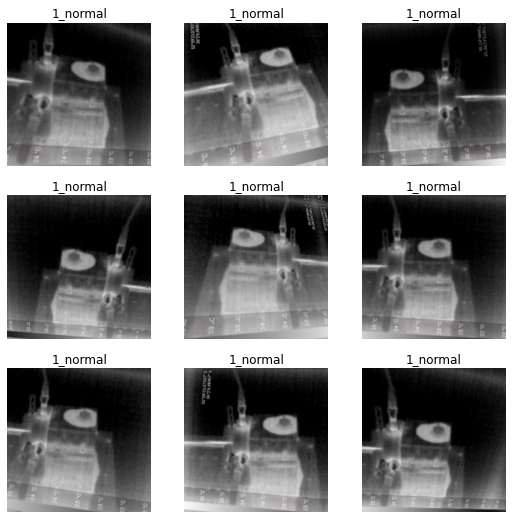

In [ ]:
from numpy.ma.extras import unique
dls.show_batch(max_n = 9, nrows = 3, unique = True)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics= error_rate, pretrained= True, lr = 0.00363)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,error_rate,time
0,0.759014,0.788694,0.344828,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.803038,0.785442,0.310345,00:07
1,0.710604,0.799666,0.344828,00:07
2,0.718164,0.817462,0.413793,00:07
3,0.798769,0.865900,0.344828,00:07
4,0.819922,0.879692,0.379310,00:07
5,0.789859,0.871390,0.344828,00:07
6,0.762914,0.849598,0.344828,00:07
7,0.776310,0.813747,0.310345,00:07
8,0.739921,0.820156,0.310345,00:07
9,0.733602,0.783771,0.241379,00:07


In [ ]:
pred_img = learn.predict(files[100]), files[100]
print(pred_img, files[100])

(('2_skewed_shaft', TensorBase(1), TensorBase([0.0016, 0.9266, 0.0138, 0.0581])), Path('/content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/3_imbalanced_shaft/img_thermal_1637918005379.jpg')) /content/gdrive/MyDrive/Colab Notebooks/tribos/DataSet4/Trianing/3_imbalanced_shaft/img_thermal_1637918005379.jpg


In [ ]:
learn.dls.vocab

['1_normal', '2_skewed_shaft', '3_imbalanced_shaft', '4_weared_bearing']

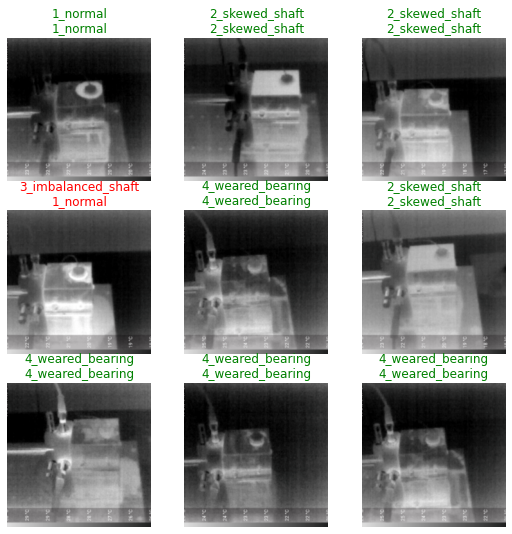

In [ ]:
learn.show_results()

**Оценка точности**


None


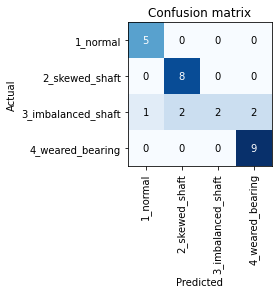

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
a = interp.plot_confusion_matrix()
print(a)

In [ ]:
low = interp.confusion_matrix()
fp_sum_fn = sum(sum(low))
tp_sum_tn = sum(np.diagonal(low))
acc = tp_sum_tn/ fp_sum_fn
acc


0.8275862068965517